In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PlacementData.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [6]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

EDA

In [7]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

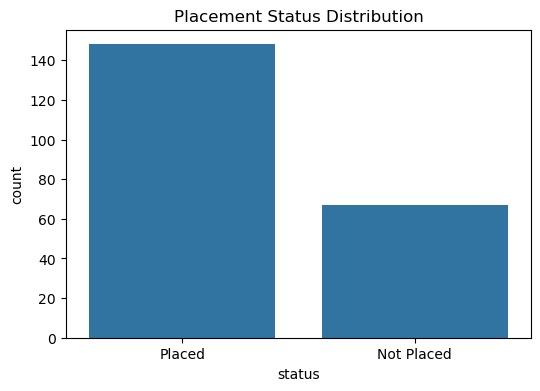

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df)
plt.title('Placement Status Distribution')
plt.show()

In [9]:
df.duplicated().value_counts()

False    215
Name: count, dtype: int64

In [10]:
df['salary'].fillna(0,inplace=True)

C:\Users\Mutaib\AppData\Local\Temp\ipykernel_15392\3403499074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(0,inplace=True)


In [11]:
df['salary'].isnull().sum()

0

ENCODING CATEGORICAL TO NUMERICAL

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender_new'] = le.fit_transform(df['gender'])
df['workex_new'] = le.fit_transform(df['workex'])
df = pd.get_dummies(df, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'])

In [13]:
pd.set_option('display.max_columns',None)

In [14]:
df

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,gender_new,workex_new,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,M,67.00,91.00,58.00,No,55.0,58.80,Placed,270000.0,1,0,False,True,False,True,False,True,False,False,False,True,False,True
1,2,M,79.33,78.33,77.48,Yes,86.5,66.28,Placed,200000.0,1,1,True,False,False,True,False,False,True,False,False,True,True,False
2,3,M,65.00,68.00,64.00,No,75.0,57.80,Placed,250000.0,1,0,True,False,True,False,True,False,False,True,False,False,True,False
3,4,M,56.00,52.00,52.00,No,66.0,59.43,Not Placed,0.0,1,0,True,False,True,False,False,False,True,False,False,True,False,True
4,5,M,85.80,73.60,73.30,No,96.8,55.50,Placed,425000.0,1,0,True,False,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,82.00,77.60,No,91.0,74.49,Placed,400000.0,1,0,False,True,False,True,False,True,False,True,False,False,True,False
211,212,M,58.00,60.00,72.00,No,74.0,53.62,Placed,275000.0,1,0,False,True,False,True,False,False,True,False,False,True,True,False
212,213,M,67.00,67.00,73.00,Yes,59.0,69.72,Placed,295000.0,1,1,False,True,False,True,False,True,False,True,False,False,True,False
213,214,F,74.00,66.00,58.00,No,70.0,60.23,Placed,204000.0,0,0,False,True,False,True,False,True,False,True,False,False,False,True


In [15]:
df.drop('gender',axis=1,inplace=True)


In [16]:
df.drop('workex', axis=1,inplace=True)

In [17]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_new,workex_new,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,55.0,58.80,Placed,270000.0,1,0,False,True,False,True,False,True,False,False,False,True,False,True
1,2,79.33,78.33,77.48,86.5,66.28,Placed,200000.0,1,1,True,False,False,True,False,False,True,False,False,True,True,False
2,3,65.00,68.00,64.00,75.0,57.80,Placed,250000.0,1,0,True,False,True,False,True,False,False,True,False,False,True,False
3,4,56.00,52.00,52.00,66.0,59.43,Not Placed,0.0,1,0,True,False,True,False,False,False,True,False,False,True,False,True
4,5,85.80,73.60,73.30,96.8,55.50,Placed,425000.0,1,0,True,False,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,Placed,400000.0,1,0,False,True,False,True,False,True,False,True,False,False,True,False
211,212,58.00,60.00,72.00,74.0,53.62,Placed,275000.0,1,0,False,True,False,True,False,False,True,False,False,True,True,False
212,213,67.00,67.00,73.00,59.0,69.72,Placed,295000.0,1,1,False,True,False,True,False,True,False,True,False,False,True,False
213,214,74.00,66.00,58.00,70.0,60.23,Placed,204000.0,0,0,False,True,False,True,False,True,False,True,False,False,False,True


In [18]:
X = df.drop(['sl_no', 'status', 'salary'], axis=1)
y = df['status'].map({'Placed':1, 'Not Placed':0})


MODEL TRAINING AND TESTING

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y)


In [20]:
X_train.shape


(172, 19)

In [21]:
X_test.shape

(43, 19)

In [22]:
print(X_train.dtypes)

ssc_p                     float64
hsc_p                     float64
degree_p                  float64
etest_p                   float64
mba_p                     float64
gender_new                  int32
workex_new                  int32
ssc_b_Central                bool
ssc_b_Others                 bool
hsc_b_Central                bool
hsc_b_Others                 bool
hsc_s_Arts                   bool
hsc_s_Commerce               bool
hsc_s_Science                bool
degree_t_Comm&Mgmt           bool
degree_t_Others              bool
degree_t_Sci&Tech            bool
specialisation_Mkt&Fin       bool
specialisation_Mkt&HR        bool
dtype: object


In [23]:
#X_train=X_train.drop(['gender','workex','dtype'],axis=1)
#X_test=X_test.drop(['gender','workex','dtype'],axis=1)

In [24]:
print(X_train.dtypes)

ssc_p                     float64
hsc_p                     float64
degree_p                  float64
etest_p                   float64
mba_p                     float64
gender_new                  int32
workex_new                  int32
ssc_b_Central                bool
ssc_b_Others                 bool
hsc_b_Central                bool
hsc_b_Others                 bool
hsc_s_Arts                   bool
hsc_s_Commerce               bool
hsc_s_Science                bool
degree_t_Comm&Mgmt           bool
degree_t_Others              bool
degree_t_Sci&Tech            bool
specialisation_Mkt&Fin       bool
specialisation_Mkt&HR        bool
dtype: object


In [25]:
model = SVC(random_state=50)


In [54]:
model.fit(X_train, y_train)

SVC(random_state=50)

In [56]:
y_pred = model.predict(X_test)

CLASSIFICATION REPORT

Test Accuracy: 0.9070

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.88      1.00      0.94        30

    accuracy                           0.91        43
   macro avg       0.94      0.85      0.88        43
weighted avg       0.92      0.91      0.90        43



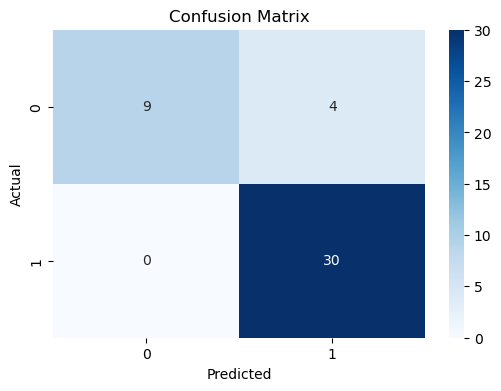

In [58]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)


plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [64]:
y_train_pred=model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_acc:.4f}")

Train Accuracy: 0.8256
